## Importing all the necessary libraries

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers.normalization import BatchNormalization
from keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Lets import data

In [4]:
print(os.listdir("../input"))

['chest-xray-pneumonia']


In [5]:
DIR = os.listdir('../input/chest-xray-pneumonia/chest_xray')
print(DIR)

['train', 'test', 'chest_xray', '__MACOSX', 'val']


In [6]:
train_folder = '../input/chest-xray-pneumonia/chest_xray/train'
test_folder = '../input/chest-xray-pneumonia/chest_xray/test'
val_folder = '../input/chest-xray-pneumonia/chest_xray/val'

In [7]:
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 50 # resize image

def get_data_train(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [8]:
train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)

In [9]:
print(len(train))
print(len(test))
print(len(val))

5216
624
16


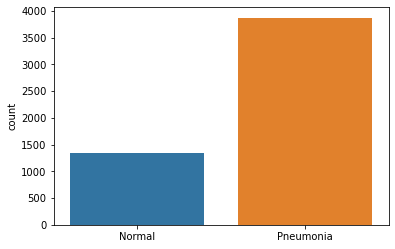

In [10]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")
        
sns.countplot(l)

In [11]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

#### Normalization

In [12]:
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

In [13]:
X_test.shape

(624, 50, 50)

Reshapping train, test and validation 

In [14]:
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

## Model 1 (CNN model)

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation="relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), shuffle=True)
scores = model.evaluate(X_test, y_test)

model.save("cnn.model")

Epoch 1/5
163/163 [==============================] - 14s 88ms/step - loss: 0.3391 - accuracy: 0.8501 - val_loss: 0.9467 - val_accuracy: 0.5625
Epoch 2/5
163/163 [==============================] - 14s 84ms/step - loss: 0.1422 - accuracy: 0.9461 - val_loss: 1.1205 - val_accuracy: 0.5625
Epoch 3/5
163/163 [==============================] - 15s 89ms/step - loss: 0.1033 - accuracy: 0.9617 - val_loss: 0.2238 - val_accuracy: 0.8125
Epoch 4/5
163/163 [==============================] - 14s 84ms/step - loss: 0.1023 - accuracy: 0.9607 - val_loss: 0.3280 - val_accuracy: 0.8125
Epoch 5/5
20/20 [==============================] - 0s 24ms/step - loss: 0.6586 - accuracy: 0.8125


In [16]:
scores

[0.6585898995399475, 0.8125]

In [17]:
# scores
print("Test loss {}".format(scores[0]))
print("Test accuracy {}".format(scores[1]))

Test loss 0.6585898995399475
Test accuracy 0.8125


In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

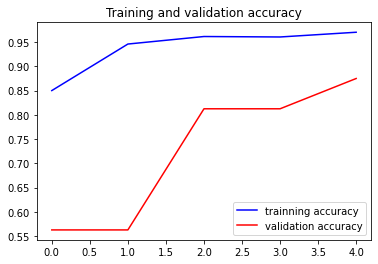

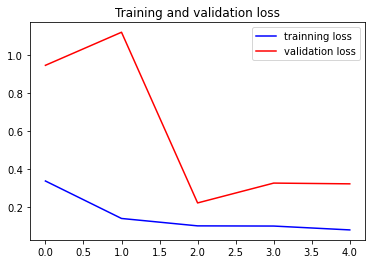

In [19]:
# visualization

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
train_datagen=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=30,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 )

val_datagen=ImageDataGenerator(rescale=1.0/255)

test_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(train_folder,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

val_generator=val_datagen.flow_from_directory(val_folder,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

test_generator=test_datagen.flow_from_directory(test_folder,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [17]:
# predict classes

prediction = model.predict_classes(X_test)
prediction = prediction.reshape(1, -1)[0]
prediction[:15]

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int32)

In [18]:
# correct and incorrect

correct = np.nonzero(prediction == y_test)[0]
incorrect = np.nonzero(prediction != y_test)[0]

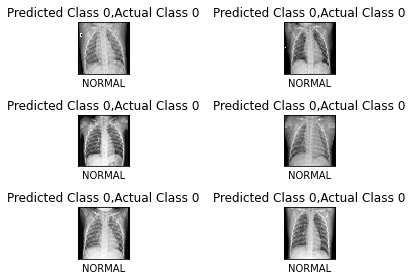

In [19]:
j = 0
for i in correct[:6]:
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(50,50), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(prediction[i], y_test[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1

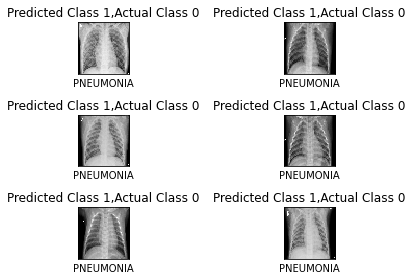

In [20]:
j = 0
for i in incorrect[:6]:
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(50,50), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(prediction[i], y_test[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1